In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.float_format', lambda x: '%.4f' % x)
%matplotlib inline
flights = pd.read_csv('flights.csv')

In [353]:
flights.index = flights.index + 1
display(flights.tail(10))    # Просмотр датасета

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,seat_economy,ticket_comfort,seat_comfort,ticket_business,seat_business,flight_time,total_amount
118,136956,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-04T10:23:00Z,2017-02-04T09:33:00Z,85.0000,85,0.0000,0,11.0000,12,50.0000,746400.0000
119,136523,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-10T11:26:00Z,2017-01-10T06:14:00Z,nan,118,nan,0,nan,12,312.0000,nan
120,136513,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-28T11:23:00Z,2017-02-28T06:13:00Z,nan,118,nan,0,nan,12,310.0000,nan
121,136514,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-07T11:13:00Z,2017-02-07T06:14:00Z,nan,118,nan,0,nan,12,299.0000,nan
122,136560,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-24T11:18:00Z,2017-01-24T06:13:00Z,nan,118,nan,0,nan,12,305.0000,nan
123,136544,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-31T11:14:00Z,2017-01-31T06:10:00Z,nan,118,nan,0,nan,12,304.0000,nan
124,136511,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-21T11:25:00Z,2017-02-21T06:15:00Z,nan,118,nan,0,nan,12,310.0000,nan
125,136540,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-17T11:21:00Z,2017-01-17T06:14:00Z,nan,118,nan,0,nan,12,307.0000,nan
126,136546,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-03T11:15:00Z,2017-01-03T06:13:00Z,nan,118,nan,0,nan,12,302.0000,nan
127,136567,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-14T11:23:00Z,2017-02-14T06:12:00Z,nan,118,nan,0,nan,12,311.0000,nan


In [354]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 1 to 127
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          127 non-null    int64  
 1   flight_no          127 non-null    object 
 2   departure_airport  127 non-null    object 
 3   arrival_airport    127 non-null    object 
 4   model              127 non-null    object 
 5   actual_arrival     127 non-null    object 
 6   actual_departure   127 non-null    object 
 7   ticket_economy     118 non-null    float64
 8   seat_economy       127 non-null    int64  
 9   ticket_comfort     118 non-null    float64
 10  seat_comfort       127 non-null    int64  
 11  ticket_business    118 non-null    float64
 12  seat_business      127 non-null    int64  
 13  flight_time        127 non-null    float64
 14  total_amount       118 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 15.0+ KB


In [304]:
flights = flights.dropna(thresh=12)
# 12/15 удаляются пустые значения в направлении аэропорта NOZ () - итог: 118 строк с заполнеными значениями
# аэропорт c кодом NOZ, находится в г. Новокузнецк, не имеется данных по проданным билетам в данном направлении

In [305]:
flights

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,seat_economy,ticket_comfort,seat_comfort,ticket_business,seat_business,flight_time,total_amount
1,136119,PG0252,AAQ,SVO,Boeing 737-300,2017-01-03T11:49:00Z,2017-01-03T10:08:00Z,102.0000,118,0.0000,0,11.0000,12,101.0000,1653000.0000
2,136120,PG0252,AAQ,SVO,Boeing 737-300,2017-02-24T11:46:00Z,2017-02-24T10:07:00Z,98.0000,118,0.0000,0,11.0000,12,99.0000,1605400.0000
3,136122,PG0252,AAQ,SVO,Boeing 737-300,2017-01-08T11:48:00Z,2017-01-08T10:08:00Z,87.0000,118,0.0000,0,10.0000,12,100.0000,1431000.0000
4,136130,PG0252,AAQ,SVO,Boeing 737-300,2017-02-13T11:46:00Z,2017-02-13T10:07:00Z,97.0000,118,0.0000,0,10.0000,12,99.0000,1556600.0000
5,136131,PG0252,AAQ,SVO,Boeing 737-300,2017-01-28T11:46:00Z,2017-01-28T10:07:00Z,112.0000,118,0.0000,0,12.0000,12,99.0000,1812800.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,136936,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-02T10:18:00Z,2017-01-02T09:28:00Z,73.0000,85,0.0000,0,9.0000,12,50.0000,632400.0000
115,136937,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-03T10:19:00Z,2017-01-03T09:29:00Z,72.0000,85,0.0000,0,9.0000,12,50.0000,626100.0000
116,136951,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-02T10:17:00Z,2017-02-02T09:28:00Z,78.0000,85,0.0000,0,12.0000,12,49.0000,720600.0000
117,136953,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-27T10:17:00Z,2017-02-27T09:27:00Z,85.0000,85,0.0000,0,12.0000,12,50.0000,765300.0000


В датасете остается два направления SVO-код аэропорта г. Москва и EGO - код аэропорта г. Белгород.Начал с аналитики первого.

In [347]:
SVO_flights = flights[(flights['arrival_airport'] == 'SVO')]

In [348]:
fuel_lt_per_min = 40     # 40 Средний расход топлива(марки ТС-1), литров в минуту для модели самолета Boeing 737-300 
fuel_lt_cost = 40       # средняя стоимость топлива марки ТС-1 за 1 литр


SVO_fuel_expenses = SVO_flights.flight_time.map(lambda x: x * fuel_lt_per_min * fuel_lt_price)
SVO_flights['SVO_profit'] = SVO_flights['total_amount'] - SVO_fuel_expenses
SVO_flights # получил новый датасет на направление SVO и добавил столбец (SVO_profit) с данными о прибыли


<ipython-input-348-e4a0c08f2b02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SVO_flights['SVO_profit'] = SVO_flights['total_amount'] - SVO_fuel_expenses


,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,seat_economy,ticket_comfort,seat_comfort,ticket_business,seat_business,flight_time,total_amount,SVO_profit
1,136119,PG0252,AAQ,SVO,Boeing 737-300,2017-01-03T11:49:00Z,2017-01-03T10:08:00Z,102.0000,118,0.0000,0,11.0000,12,101.0000,1653000.0000,1491400.0000
2,136120,PG0252,AAQ,SVO,Boeing 737-300,2017-02-24T11:46:00Z,2017-02-24T10:07:00Z,98.0000,118,0.0000,0,11.0000,12,99.0000,1605400.0000,1447000.0000
3,136122,PG0252,AAQ,SVO,Boeing 737-300,2017-01-08T11:48:00Z,2017-01-08T10:08:00Z,87.0000,118,0.0000,0,10.0000,12,100.0000,1431000.0000,1271000.0000
4,136130,PG0252,AAQ,SVO,Boeing 737-300,2017-02-13T11:46:00Z,2017-02-13T10:07:00Z,97.0000,118,0.0000,0,10.0000,12,99.0000,1556600.0000,1398200.0000
5,136131,PG0252,AAQ,SVO,Boeing 737-300,2017-01-28T11:46:00Z,2017-01-28T10:07:00Z,112.0000,118,0.0000,0,12.0000,12,99.0000,1812800.0000,1654400.0000
6,136132,PG0252,AAQ,SVO,Boeing 737-300,2017-02-15T11:48:00Z,2017-02-15T10:09:00Z,104.0000,118,0.0000,0,12.0000,12,99.0000,1714000.0000,1555600.0000
7,136135,PG0252,AAQ,SVO,Boeing 737-300,2017-02-01T11:48:00Z,2017-02-01T10:08:00Z,104.0000,118,0.0000,0,11.0000,12,100.0000,1678600.0000,1518600.0000
8,136146,PG0252,AAQ,SVO,Boeing 737-300,2017-02-09T11:48:00Z,2017-02-09T10:08:00Z,98.0000,118,0.0000,0,11.0000,12,100.0000,1604200.0000,1444200.0000
9,136159,PG0252,AAQ,SVO,Boeing 737-300,2017-01-04T11:45:00Z,2017-01-04T10:07:00Z,103.0000,118,0.0000,0,12.0000,12,98.0000,1700600.0000,1543800.0000
10,136164,PG0252,AAQ,SVO,Boeing 737-300,2017-01-07T11:46:00Z,2017-01-07T10:07:00Z,109.0000,118,0.0000,0,11.0000,12,99.0000,1738400.0000,1580000.0000


count        59.0000
mean    1482847.4576
std      132425.4499
min     1238000.0000
25%     1384800.0000
50%     1470200.0000
75%     1580000.0000
max     1726000.0000
Name: SVO_profit, dtype: float64

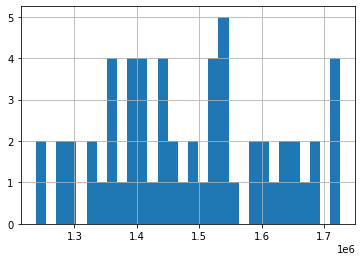

In [343]:
SVO_flights['SVO_profit'].hist(bins=30);
SVO_flights['SVO_profit'].describe()

In [346]:
SVO_unprofitable = SVO_flights[(SVO_flights.SVO_profit < SVO_flights.SVO_profit.quantile(0.25))].flight_id
# критерий для прибыльности на уровне 25%
print(list(SVO_unprofitable))
# список с flight_id, неприбыльных рейсов

[136122, 136178, 136185, 136202, 136204, 136250, 136282, 136320, 136345, 136360, 136366, 136383, 136464, 136485, 136486]


In [ ]:
Аналитика для направления EGO - г. Белгород

In [310]:
EGO_flights = flights[(flights['arrival_airport'] == 'EGO')] # модель самолета для этого направления Sukhoi Superjet 100

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,seat_economy,ticket_comfort,seat_comfort,ticket_business,seat_business,flight_time,total_amount
60,136571,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-25T10:18:00Z,2017-01-25T09:28:00Z,83.0000,85,0.0000,0,12.0000,12,50.0000,752700.0000
61,136586,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-10T10:18:00Z,2017-01-10T09:28:00Z,84.0000,85,0.0000,0,12.0000,12,50.0000,759000.0000
62,136600,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-08T10:16:00Z,2017-02-08T09:26:00Z,85.0000,85,0.0000,0,12.0000,12,50.0000,765300.0000
63,136605,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-15T10:19:00Z,2017-02-15T09:28:00Z,85.0000,85,0.0000,0,12.0000,12,51.0000,765300.0000
64,136609,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-08T10:18:00Z,2017-01-08T09:28:00Z,71.0000,85,0.0000,0,10.0000,12,50.0000,639300.0000
65,136612,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-21T10:17:00Z,2017-02-21T09:27:00Z,82.0000,85,0.0000,0,12.0000,12,50.0000,746400.0000
66,136620,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-17T10:19:00Z,2017-02-17T09:30:00Z,70.0000,85,0.0000,0,9.0000,12,49.0000,613500.0000
67,136630,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-25T10:22:00Z,2017-02-25T09:32:00Z,82.0000,85,0.0000,0,12.0000,12,50.0000,746400.0000
68,136632,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-07T13:33:00Z,2017-01-07T12:42:00Z,80.0000,85,0.0000,0,11.0000,12,51.0000,714300.0000
69,136642,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-30T10:17:00Z,2017-01-30T09:28:00Z,54.0000,85,0.0000,0,10.0000,12,49.0000,531000.0000


In [311]:
fuel_lt_per_min = 28    # 28 Средний расход топлива(марки ТС-1), литров в минуту для модели самолета Sukhoi Suprjet 100  
fuel_lt_cost = 40       # средняя стоимость топлива марки ТС-1 за 1 литр

EGO_fuel_expenses = EGO_flights.flight_time.map(lambda x: x * fuel_lt_per_min * fuel_lt_price)
EGO_flights['EGO_profit'] = EGO_flights['total_amount'] - EGO_fuel_expenses
EGO_flights   # получил новый датасет на направление SVO и добавил столбец (SVO_profit) с данными о прибыли

<ipython-input-311-3c10e78c9a26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EGO_flights['EGO_profit'] = EGO_flights['total_amount'] - EGO_fuel_expenses


,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,seat_economy,ticket_comfort,seat_comfort,ticket_business,seat_business,flight_time,total_amount,EGO_profit
60,136571,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-25T10:18:00Z,2017-01-25T09:28:00Z,83.0000,85,0.0000,0,12.0000,12,50.0000,752700.0000,696700.0000
61,136586,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-10T10:18:00Z,2017-01-10T09:28:00Z,84.0000,85,0.0000,0,12.0000,12,50.0000,759000.0000,703000.0000
62,136600,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-08T10:16:00Z,2017-02-08T09:26:00Z,85.0000,85,0.0000,0,12.0000,12,50.0000,765300.0000,709300.0000
63,136605,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-15T10:19:00Z,2017-02-15T09:28:00Z,85.0000,85,0.0000,0,12.0000,12,51.0000,765300.0000,708180.0000
64,136609,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-08T10:18:00Z,2017-01-08T09:28:00Z,71.0000,85,0.0000,0,10.0000,12,50.0000,639300.0000,583300.0000
65,136612,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-21T10:17:00Z,2017-02-21T09:27:00Z,82.0000,85,0.0000,0,12.0000,12,50.0000,746400.0000,690400.0000
66,136620,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-17T10:19:00Z,2017-02-17T09:30:00Z,70.0000,85,0.0000,0,9.0000,12,49.0000,613500.0000,558620.0000
67,136630,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-25T10:22:00Z,2017-02-25T09:32:00Z,82.0000,85,0.0000,0,12.0000,12,50.0000,746400.0000,690400.0000
68,136632,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-07T13:33:00Z,2017-01-07T12:42:00Z,80.0000,85,0.0000,0,11.0000,12,51.0000,714300.0000,657180.0000
69,136642,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-30T10:17:00Z,2017-01-30T09:28:00Z,54.0000,85,0.0000,0,10.0000,12,49.0000,531000.0000,476120.0000


count       59.0000
mean    654340.6780
std      65708.4745
min     475000.0000
25%     610790.0000
50%     690400.0000
75%     708180.0000
max     710420.0000
Name: EGO_profit, dtype: float64

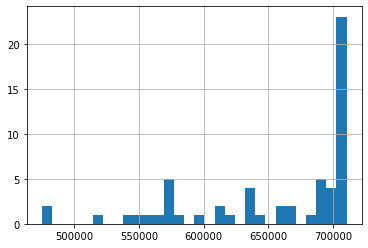

In [275]:
EGO_flights['EGO_profit'].hist(bins=30);
EGO_flights['EGO_profit'].describe()

In [360]:
EGO_unprofitable = EGO_flights[(EGO_flights.EGO_profit < EGO_flights.EGO_profit.quantile(.25))].flight_id
# критерий для прибыльности на уровне 25%
print(list(EGO_unprofitable)) # список с flight_id, неприбыльных рейсов

[136609, 136620, 136642, 136645, 136666, 136678, 136767, 136807, 136823, 136844, 136887, 136888, 136922, 136936, 136937]
